In [2]:
__author__ = "Bar Dadon"
__email__ = "bdadon50@gmail.com"

# <ins> Understanding and Predicting Employees Salary

## Table of Contents

### The Problem 
- [Why Do We Need to Predict employees salaries?](#problem)

### Data Quality Check And Cleaning 
- [Simple Inspection of Data](#dataInspect)
- [Summery Statistics](#Summery)

### Exploratory data analysis
- [Salary Inspection](#salaryInspect)
- [Outliers Detection](#outliersDetection)
- [Features Distribution](#featuresDistribution)
- [Features Analysis](#FeaturesAnalysis)
- [Correlation Analysis](#CorrelationAnalysis)
- [Baseline Model](#BaselineModel)

### Pre-Processing
- [Categorical Data](#CategoricalData)
- [Creating Train and Target Data Sets](#TrainAndTarget)

### Develop
- [Creating Models](#CreatingModels)
- [Model Selection](#ModelSelection)

### Deploy
- [Pre:Processing Test data](#TestData)
- [Feature Importance](#FeatureImportance)

<a id= 'problem' ></a>
# <ins> The Problem 

 - __The Goal of This Project__ Is to Create a Model that Hr Teams Can Use to __Predict Their Employees Salaries and Accuratley Post Job Offers__ with the Right Salary that Will Appeal to the Right People.
by Creating a Fast and Accurate Model that Predicts Salaries, __Companies Can Invest Their Hr Resources and Personnel__ Into Different Initiatives Like Properly __Filter Through Candidates__ or __Investing in Reducing Employees Turnover__ and So On.
It Can Reduce Costs for The Company by Eliminating Cases Where the Employees Were Offered Salaries that Weren't Compatible with Their Value to The Company
and Thus Were Over Paid, While Also Reduce Losing Applicants Because of Under Offers of Salaries.

- __<ins>The Data at Our Disposal Consists of 1m Samples of Employees that Are Defined by The Features:</ins>__
    1. Job Id	
    - Company Id	
    - Job Type	
    - Degree	
    - Major	
    - Industry	
    - Years Of Experience	
    - Miles from Metropolis


- The Metric that Will Be Used in This Project Is MSE(Mean Squared Error)



# <ins> Import Packages

In [3]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing , svm
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

# <ins> General functions

In [4]:
def load_file(file):
    '''Loads a csv file'''
    return pd.read_csv(file)

def consolidate_data(df1, df2, key=None, left_index=False, right_index=False):
    '''Merge two Data Frames, return only records that appear in both data sets'''
    return pd.merge(left = df1, right = df2, how = 'inner',on = key, left_index=False, right_index=False)

def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).to_numpy().nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).to_numpy().nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print('Summery Stats(Numerical): ')
    print(df.describe())
    print('\n')
    
    
    print('Summery Stats(Objects): ')
    print(df.astype('object').describe().transpose())
    print('\n')
    
    print("Dataframe Sample Rows::")
    display(df.head(5))

# <ins> Data Quality Check and Cleaning

<a id= dataInspect ></a>
## Read the Data

In [5]:
#load the data into a Pandas dataframe
train_features = load_file('C:/Users/user/Desktop/Data Science/DSDJ/Module 4 - Portfolio/train_features.csv')
train_salaries = load_file('C:/Users/user/Desktop/Data Science/DSDJ/Module 4 - Portfolio/train_salaries.csv')
test_features = load_file('C:/Users/user/Desktop/Data Science/DSDJ/Module 4 - Portfolio/test_features.csv')

In [18]:
train_features.head(10)

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


- All the Features Seem Relevant to The Target Variable, Except Company Id Which Adds No Value ----> __Dropping Company Id Column__ 

In [7]:
train_features = train_features.drop('companyId',axis=1)
train_features

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...,...
999995,JOB1362685407682,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,JOB1362685407683,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JOB1362685407684,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,JOB1362685407685,CFO,MASTERS,NONE,HEALTH,6,5


In [8]:
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [9]:
train_features.isnull().any()
train_salaries.isnull().any()

jobId     False
salary    False
dtype: bool

- Train Data Doesnt Contain Any Null Values

##  Merging the Features with The Target Variable(Salary)

In [10]:
train = consolidate_data(train_features,train_salaries)

<a id = Summery ></a>
## Summery Statistics

In [11]:
describe_dataframe(train)




******************************
About the Data
******************************
Number of rows:: 1000000
Number of columns:: 8


Column Names:: ['jobId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis', 'salary']


Column Data Types::
 jobId                  object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object


Columns with Missing Values:: []


Number of rows with Missing Values:: 0


Sample Indices with missing data:: []


General Stats::
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   jobType              1000000 non-null  object
 2   degree               

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


- Train Data Contain __Salaries that Are Equal to Zero__ ----> __Further Inspection Required__

In [12]:
zero_salary_employees = train[train['salary'] == 0]
zero_salary_employees

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


- Some Jobs Belong to Educated, High Ranking Employees with A Lot of Years of Experience.
There's Reason to Believe that __The Salaries Were Generated Due to Corrupted Data__ 
- In Addition, There Are only 5 Employees with 0 Salary, Dropping Them Won't Affect the Data Set

- __Dropping Data with Salary Equal to Zero__

In [13]:
train = train[train['salary'] > 0]

In [14]:
train['jobId'].duplicated().sum()

0

- Train Data Doesn't Contain Any Duplicated Values

# <ins> Exploratory Data Analysis

<a id = salaryInspect ></a>
##  EDA 1 - Target Variable(Salary) Inspection

In [15]:
train.salary.describe()

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

- Salaries Ranges Between 17 to 301
- The Mean Is 116 and The Median Is 114,meaning the Data Most Likely Isn't Skewed
- Most Salaries Are Between 88 to 141 
- Considering the Overall Range It Means that __There Are a Few Extreme Outliers__ ----> __Further Inspection Required__
    

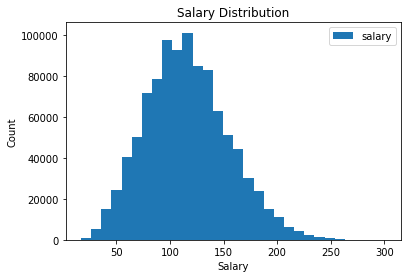

In [16]:
salary_dist = train['salary'].plot.hist(bins=30)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Distribution')
plt.legend(loc = 'best')
plt.show()

- The __Data Looks Symetrical__, Visually There's No Reason to Manipulate The Data 

<a id = outliersDetection></a>
### IQR rule to identify potential outliers

The Upper and Lower Bounds for Suspected Outliers Are 220.5 and 8.5.


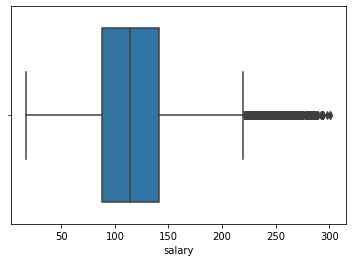

In [172]:
stat = train.salary.describe()
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
if lower < 0:
    lower = 0
    
sns.boxplot(train.salary)
print('The Upper and Lower Bounds for Suspected Outliers Are {} and {}.'.format(upper, lower))

<ins> __Checking for Corrupted Data for The Outliers__
- Checking for Any Logical Errors About High Payed Employees(salary Above 220.5)

In [173]:
high_salary_outliers = train[train['salary'] > 220.5]
high_salary_outliers

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


- There Are About 7000 Employees with High Paying Jobs(Salary Above 220.5)

In [174]:
high_salary_outliers = high_salary_outliers.set_index('salary').sort_values('salary',ascending = False)

In [175]:
high_salary_outliers.groupby('jobType').describe()

yearsExperience                                                \
                         count       mean       std   min    25%   50%   75%   
jobType                                                                        
CEO                     3227.0  19.475984  4.171720   0.0  17.00  21.0  23.0   
CFO                     1496.0  20.348930  3.679270   2.0  19.00  21.0  23.0   
CTO                     1488.0  20.129704  3.695357   5.0  18.00  21.0  23.0   
JUNIOR                    20.0  22.750000  1.743409  18.0  22.00  23.5  24.0   
MANAGER                  217.0  21.364055  2.575022  14.0  20.00  22.0  24.0   
SENIOR                    66.0  22.257576  1.791524  16.0  21.25  23.0  24.0   
VICE_PRESIDENT           603.0  20.842454  3.064650   9.0  19.00  22.0  23.0   

                     milesFromMetropolis                                  \
                 max               count       mean        std  min  25%   
jobType                                                                    
CEO             24.0              3227.0  23.017354  19.403017  0.0  8.0   
CFO             24.0              1496.0  19.959893  17.268867  0.0  6.0   
CTO             24.0              1488.0  20.081989  17.737153  0.0  6.0   
JUNIOR          24.0                20.0   8.950000   9.949742  0.0  2.0   
MANAGER         24.0               217.0  14.000000  11.736300  0.0  5.0   
SENIOR          24.0                66.0  10.651515  10.544401  0.0  3.0   
VICE_PRESIDENT  24.0               603.0  16.925373  14.145638  0.0  5.0   

                                  
                 50%   75%   max  
jobType                           
CEO             18.0  34.0  98.0  
CFO             15.5  29.0  88.0  
CTO             15.0  29.0  95.0  
JUNIOR           3.5  13.5  29.0  
MANAGER         11.0  20.0  51.0  
SENIOR           7.5  15.0  41.0  
VICE_PRESIDENT  14.0  24.5  93.0

In [176]:
high_salary_outliers.describe()

,yearsExperience,milesFromMetropolis
count,7117.000000,7117.000000
mean,20.004496,20.815653
std,3.867752,18.110057
min,0.000000,0.000000
25%,18.000000,7.000000
50%,21.000000,16.000000
75%,23.000000,30.000000
max,24.000000,98.000000


In [177]:
high_salary_outliers.groupby('jobType').mean()

,yearsExperience,milesFromMetropolis
jobType,,
CEO,19.475984,23.017354
CFO,20.348930,19.959893
CTO,20.129704,20.081989
JUNIOR,22.750000,8.950000
MANAGER,21.364055,14.000000
SENIOR,22.257576,10.651515
VICE_PRESIDENT,20.842454,16.925373


- Most of The High Salary Employees Belong to High Ranking Job Types
- The Majority of Them Are CEO/CFO/CTO 
- Some High Salary Employees Belong to Junior Position Employees ----> Further Inspection Required 

In [178]:
high_salary_juniors = high_salary_outliers[high_salary_outliers['jobType'] == 'JUNIOR']
high_salary_juniors

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
salary,,,,,,,
248,JOB1362684507729,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8
246,JOB1362684435397,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3
236,JOB1362685151013,JUNIOR,DOCTORAL,BUSINESS,FINANCE,19,0
232,JOB1362685195361,JUNIOR,DOCTORAL,BUSINESS,FINANCE,18,15
230,JOB1362685035221,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29
228,JOB1362685204643,JUNIOR,MASTERS,BUSINESS,OIL,24,2
227,JOB1362684908426,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0
226,JOB1362684711465,JUNIOR,MASTERS,ENGINEERING,WEB,24,2
226,JOB1362684756041,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25


- Most of The High Salary Juniors Have Masters and Doctoral Degrees
- The Only Employee With Bachelors Degree Has Over 20 Years of Experience
- __Theres No Reason to Suspect that The Data Is Corrupted__

- Checking for Any Logical Errors About Low Payed Employees(salary Below 8.5)

In [179]:
low_salary_outliers = train[train['salary'] < 8.5]
low_salary_outliers

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


- There Are No Employees with Salaries Lower than 8.5 

<a id = featuresDistribution></a>
## EDA 2 - Feature Distribution 

In [180]:
cat_cols = train.drop('jobId',axis=1).select_dtypes(['object']).columns.values
cat_cols

array(['jobType', 'degree', 'major', 'industry'], dtype=object)

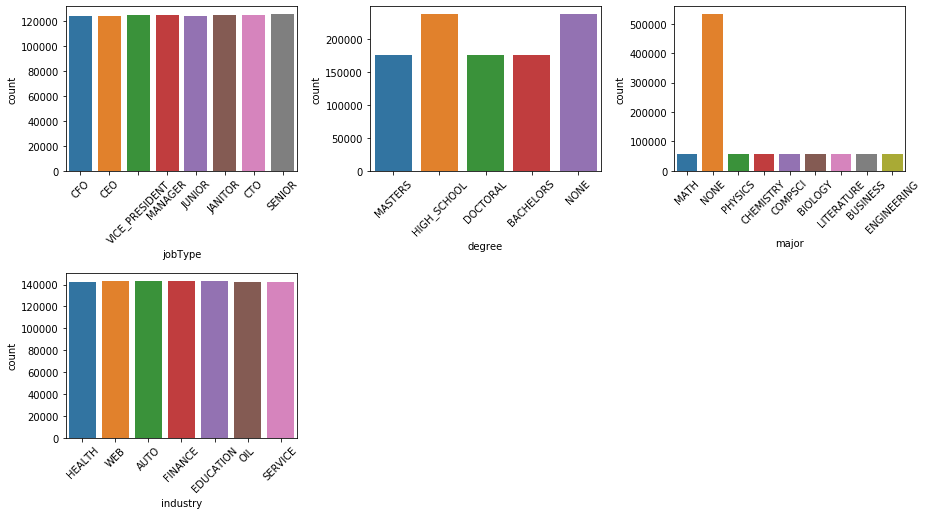

In [181]:
plt.figure(figsize=(13, 10))
i = 1
for col in cat_cols:
    plt.subplot(3,3,i)
    
    sns.countplot(train[col])
    plt.xticks(rotation = 45)
    plt.tick_params(labelbottom = True)
    
    i += 1
plt.tight_layout()

- Jobtype, Degree and Industry Features Are Uniformly Distributed
- Major Is __Not__ Uniformly Distributed

<a id = FeaturesAnalysis></a>
## EDA 3 - Feature Analysis - Finding Correlation for Each Feature with The Target (Salary)

- <ins> __jobType__ </ins>:

[Text(0, 0, 'CTO'),
 Text(0, 0, 'CFO'),
 Text(0, 0, 'CEO'),
 Text(0, 0, 'VICE_PRESIDENT'),
 Text(0, 0, 'MANAGER'),
 Text(0, 0, 'SENIOR'),
 Text(0, 0, 'JUNIOR'),
 Text(0, 0, 'JANITOR')]

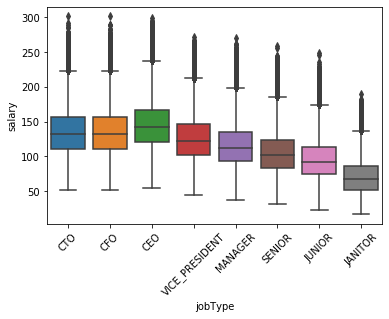

In [182]:
job_salary_df = train[['jobType','salary']]
sorted_train = job_salary_df.sort_values(ascending = False, by = 'salary')
chart = sns.boxplot(x = 'jobType', y = 'salary', data=sorted_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text xticklabel objects>)

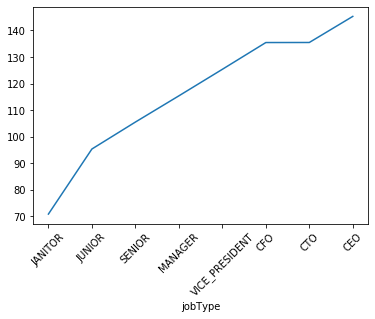

In [183]:
train.groupby('jobType')['salary'].mean().sort_values().plot()
plt.xticks(rotation = 45)

- Positive Correlation Between Job Type to Salary 

- <ins> __Degree__ </ins>:

[Text(0, 0, 'MASTERS'),
 Text(0, 0, 'DOCTORAL'),
 Text(0, 0, 'BACHELORS'),
 Text(0, 0, 'HIGH_SCHOOL'),
 Text(0, 0, 'NONE')]

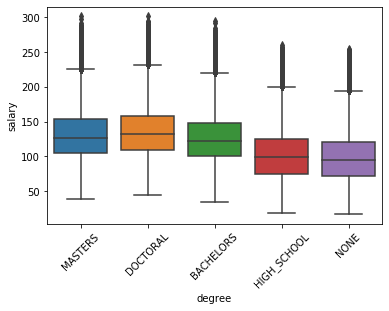

In [184]:
degree_salary_df = train[['degree','salary']]
sorted_train = degree_salary_df.sort_values(ascending = False, by = 'salary')
chart = sns.boxplot(x = 'degree', y = 'salary', data=sorted_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text xticklabel objects>)

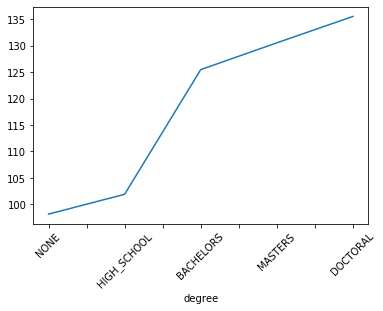

In [185]:
train.groupby('degree')['salary'].mean().sort_values().plot()
plt.xticks(rotation = 45)

- Positive Correlation Between Degree to Salary 

- <ins> __Major__ </ins> :

[Text(0, 0, 'ENGINEERING'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'PHYSICS'),
 Text(0, 0, 'COMPSCI'),
 Text(0, 0, 'BIOLOGY'),
 Text(0, 0, 'CHEMISTRY'),
 Text(0, 0, 'MATH'),
 Text(0, 0, 'LITERATURE'),
 Text(0, 0, 'NONE')]

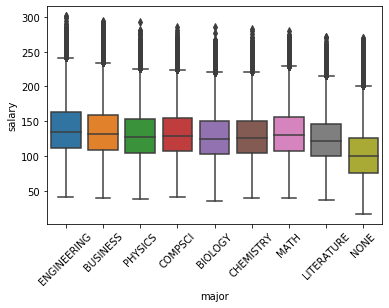

In [186]:
major_salary_df = train[['major','salary']]
sorted_train = major_salary_df.sort_values(ascending = False, by = 'salary')
chart = sns.boxplot(x = 'major', y = 'salary', data=sorted_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

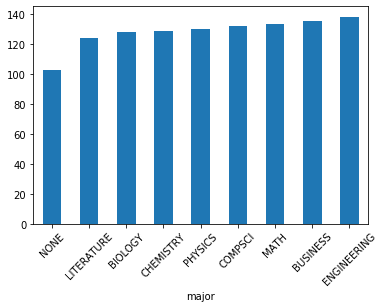

In [187]:
train.groupby('major')['salary'].mean().sort_values().plot(kind = 'bar')
plt.xticks(rotation = 45)

- The Highest Paying Majors Are : Engineering and Business 

- <ins> __Industry__ </ins> :

[Text(0, 0, 'OIL'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'WEB'),
 Text(0, 0, 'HEALTH'),
 Text(0, 0, 'AUTO'),
 Text(0, 0, 'SERVICE'),
 Text(0, 0, 'EDUCATION')]

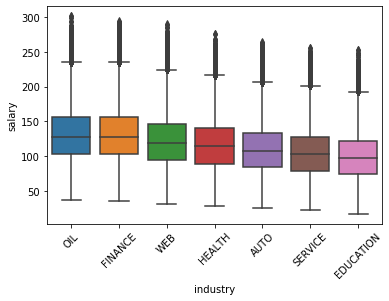

In [188]:
industry_salary_df = train[['industry','salary']]
sorted_train = industry_salary_df.sort_values(ascending = False, by = 'salary')
chart = sns.boxplot(x = 'industry', y = 'salary', data=sorted_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

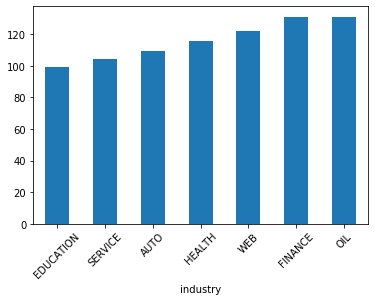

In [189]:
train.groupby('industry')['salary'].mean().sort_values().plot(kind = 'bar')
plt.xticks(rotation = 45)

- The Highest Paying Industries Are : Oil, Finance and Web 

- <ins>__Experience__</ins>:

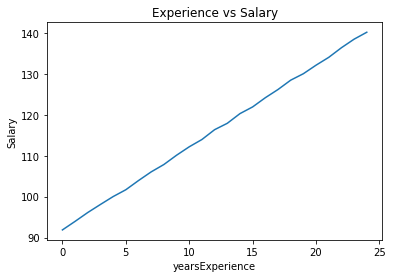

In [190]:
year_df = train.groupby('yearsExperience')['salary'].mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Experience')
ax1.set_ylabel('Salary')
ax1.set_title('Experience vs Salary')
year_df.plot(kind = 'line')
plt.show()

- Positive Correlation Between Experience to Salary 

- <ins>__milesFromMetropolis__<ins>:

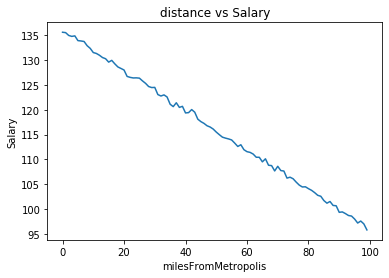

In [191]:
distance_df = train.groupby('milesFromMetropolis')['salary'].mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('distance')
ax1.set_ylabel('Salary')
ax1.set_title('distance vs Salary')
distance_df.plot(kind = 'line')
plt.show()

- Negetive Correlation Between Miles from Metropolis to Salary 

<a id = CorrelationAnalysis></a>
## EDA 4 - Correlation Analysis

<ins> __Giving Categories a Score Value__ 
- Score = Salary Mean   

In [192]:
def encode_label(df, col):
    '''encode the categories using average salary for each category to replace label'''
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_avg_salary[train_avg_salary[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)
train_avg_salary = train.copy()

In [193]:
for col in train_avg_salary.columns:
    if train_avg_salary[col].dtype.name == "object" and col != 'jobId':
        train_avg_salary[col] = train_avg_salary[col].astype('category')
        encode_label(train_avg_salary, col)
        train_avg_salary[col] = pd.to_numeric(train_avg_salary[col])

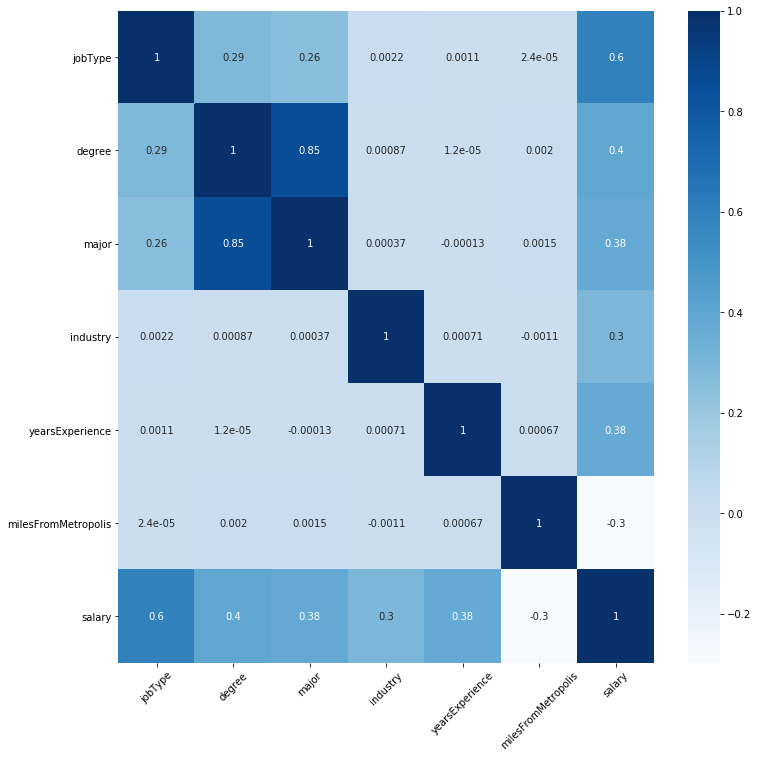

In [194]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 12))
features = [
 'jobType',
 'degree',
 'major',
 'industry',
 'yearsExperience',
 'milesFromMetropolis']
 
sns.heatmap(train_avg_salary[features + ['salary']].corr(),xticklabels=1 ,cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

<ins> __Positive Correlation with Salary:__
- Jobtype
- Degree
- Major and Experience
- Industry

<ins> __Negetive Correlation with Salary:__
- Miles from Metropolis

<ins> __Other Notes:__
- There's a Positive Correlation Square for The Features : Job Type, Degree and Major
- There's a __Very High Correlation__ Between Degree and Major, Such Correlation Will Negatively Affect Some Models

<a id = BaselineModel></a>
## EDA 5 - Establishing a Baseline Model
- The Metric Chosen to Measure Performance Is : MSE

- Let's Consider a Model that Predicts the Salary Based Solely On The Job Type
For Instance, if Mean Salary of Manager Is 100k, Then All the Jobs with Job Type 'manager' Will Have 100k as Their Predicted Salary

In [195]:
train[['jobType','major','degree','industry']] = train[['jobType','major','degree','industry']].astype('category')

In [196]:
def baseline(df,col):
    
    jobs_dict = {}
    pred_salary = []
    jobs = train[col].cat.categories.tolist()
    
    for job in jobs:
        jobs_dict[job] = train[train[col] == job]['salary'].mean()
    
    pred_salary = df[col].map(jobs_dict)
    
    return pred_salary

In [197]:
baseline(train,'jobType')

0         135.458547
1         145.311425
2         125.368630
3         115.368518
4         125.368630
             ...    
999995    125.368630
999996    135.481067
999997     95.333087
999998    135.458547
999999     95.333087
Name: jobType, Length: 999995, dtype: category
Categories (8, float64): [145.311425, 135.458547, 135.481067, 70.813045, 95.333087, 115.368518, 105.487775, 125.368630]

In [198]:
baseline_score = mse(train['salary'], baseline(train, 'jobType'))
print('baseline_model has an MSE of: ',baseline_score )

baseline_model has an MSE of:  963.9252996562975


- Our Aim Is to Achieve a Better Score than __963.9 Mean Squared Error__

# <ins> Pre-processing 

<a id = CategoricalData></a>
## Turning categorical data into numeric values

In [199]:
categorical_vars = ['jobType', 'degree', 'industry','major']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

<ins> __Turning Ordinal Data(Job Type, Degree) Into Numerical__

In [200]:
cat_df = pd.get_dummies(train[categorical_vars])
num_df = train[numeric_vars]

<a id = TrainAndTarget></a>
## Creating Train and Target Data Sets

In [201]:
clean_train_df = pd.concat([cat_df,num_df],axis=1)
target_df = train[target_var]

In [202]:
clean_train_df.shape

(999995, 31)

In [203]:
clean_train_df.columns

Index(['jobType_CEO', 'jobType_CFO', 'jobType_CTO', 'jobType_JANITOR',
       'jobType_JUNIOR', 'jobType_MANAGER', 'jobType_SENIOR',
       'jobType_VICE_PRESIDENT', 'degree_BACHELORS', 'degree_DOCTORAL',
       'degree_HIGH_SCHOOL', 'degree_MASTERS', 'degree_NONE', 'industry_AUTO',
       'industry_EDUCATION', 'industry_FINANCE', 'industry_HEALTH',
       'industry_OIL', 'industry_SERVICE', 'industry_WEB', 'major_BIOLOGY',
       'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI',
       'major_ENGINEERING', 'major_LITERATURE', 'major_MATH', 'major_NONE',
       'major_PHYSICS', 'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

# <INS> Develop

<a id = CreatingModels></a>
##  Creating Models

1) <ins> __Linear Regression__<ins>

In [205]:
X = np.array(clean_train_df)
y = np.array(target_df)
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [206]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Linear Regression:')
accuracy0 = clf.score(X_test,y_test)
print('Regression Accuracy : ' + str(accuracy0))

Linear Regression:
Regression Accuracy : 0.7438185950862517


2) <ins> __RandomForest__<ins>

In [207]:
X = np.array(clean_train_df)
y = np.array(target_df)
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [208]:
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, max_depth = 25, min_samples_split=60 )
rf.fit(X_train,y_train)
print('Random Forest:')
accuracy0 = rf.score(X_test,y_test)
print('Random Forest Accuracy : ' + str(accuracy0))

Random Forest:
Random Forest Accuracy : 0.7566824932891807


3) <ins> __GradientBoosting__<ins>

In [209]:
X = np.array(clean_train_df)
y = np.array(target_df)
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [210]:
gbm = GradientBoostingRegressor(n_estimators=100, max_depth=6, loss='ls',verbose=0)
gbm.fit(X_train,y_train)
print('Gradient Boosting:')
accuracy0 = gbm.score(X_test,y_test)
print('Gradient Boosting Accuracy : ' + str(accuracy0))

Gradient Boosting:
Gradient Boosting Accuracy : 0.7614124611269681


In [211]:
mean_mse = {}
cv_std = {}


neg_mse = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=2, scoring='neg_mean_squared_error')
mean_mse[clf] = -1.0*np.mean(neg_mse)
cv_std[clf] = np.std(neg_mse)

print("Beginning cross validation")
print('LinearRegression() ')
print('Average MSE:\n', mean_mse[clf])
print('Standard deviation during CV:\n', cv_std[clf])

Beginning cross validation
LinearRegression() 
Average MSE:
 384.4522213044704
Standard deviation during CV:
 1.5161618654514382


In [212]:
mean_mse = {}
cv_std = {}


neg_mse = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=2, scoring='neg_mean_squared_error')
mean_mse[rf] = -1.0*np.mean(neg_mse)
cv_std[rf] = np.std(neg_mse)

print("Beginning cross validation")
print('RandomForest ')
print('Average MSE:\n', mean_mse[rf])
print('Standard deviation during CV:\n', cv_std[rf])

Beginning cross validation
RandomForest 
Average MSE:
 367.0372453106321
Standard deviation during CV:
 1.1793697694990812


In [213]:
mean_mse = {}
cv_std = {}


neg_mse = cross_val_score(gbm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse[gbm] = -1.0*np.mean(neg_mse)
cv_std[gbm] = np.std(neg_mse)

print("Beginning cross validation")
print('Gradient Boosting ')
print('Average MSE:\n', mean_mse[gbm])
print('Standard deviation during CV:\n', cv_std[gbm])

Beginning cross validation
Gradient Boosting 
Average MSE:
 358.0718742654236
Standard deviation during CV:
 1.4564274169623386


<a id = ModelSelection></a>
## Selecting the best model

- The Model with The Lowest Mean Square Error(MSE) Will Be the Best Model.

In [214]:
model = min(mean_mse, key=mean_mse.get)
print('\nBest model is: \n')
print(model)


Best model is: 

GradientBoostingRegressor(max_depth=6)


- We Need to Fit the __Gradient Boosting Regressor__ Model on All the Training Data to Make Future Salary Predictions from The Test Dataset

In [215]:
model.fit(X,y)

GradientBoostingRegressor(max_depth=6)

# <ins> Deploy

- The Test Data Should Be Cleaned as The Train Data Was Cleaned and It Should Undergo the Same Encoding and Manipulation to Match the Shape of The Training Dataset

<a id = TestData ></a>
<ins> __The Changes I Have Made to The  Training Dataset Are:__
- Dropping Company Id Column
- Dropping job Id Column
- Turning Categorical Features Into Numeric via Dummy Variables

In [216]:
test_feat = test_features.copy()

In [217]:
test_feat = test_feat.drop('companyId',axis=1)
test_feat = test_feat.drop('jobId',axis=1)

In [218]:
categorical_vars = ['jobType', 'degree', 'industry','major']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']

In [219]:
cat_df = pd.get_dummies(test_feat[categorical_vars])
num_df = test_feat[numeric_vars]

clean_test_df = pd.concat([cat_df,num_df],axis=1)

In [227]:
clean_test_df.head()

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,yearsExperience,milesFromMetropolis
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,22,73
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,20,47
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,9
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,14,96
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,10,44


In [222]:
#predicting the salaries from test dataset
predictions = pd.DataFrame(model.predict(clean_test_df))

In [223]:
#Concatenating the predicted salaries to the original test dataset
prediction_df=pd.concat([test_features,predictions],axis=1)

## Exporting The Predictions to A Csv File

In [ ]:
prediction_df.to_csv('salaries_predicted.csv')

<a id = FeatureImportance></a>
## Feature Importances

In [224]:
importance = model.feature_importances_
feature_importances = pd.DataFrame({'feature':clean_test_df.columns, 'importance':importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

Text(0.5, 1.0, 'FEATURE IMPORTANCE PLOT')

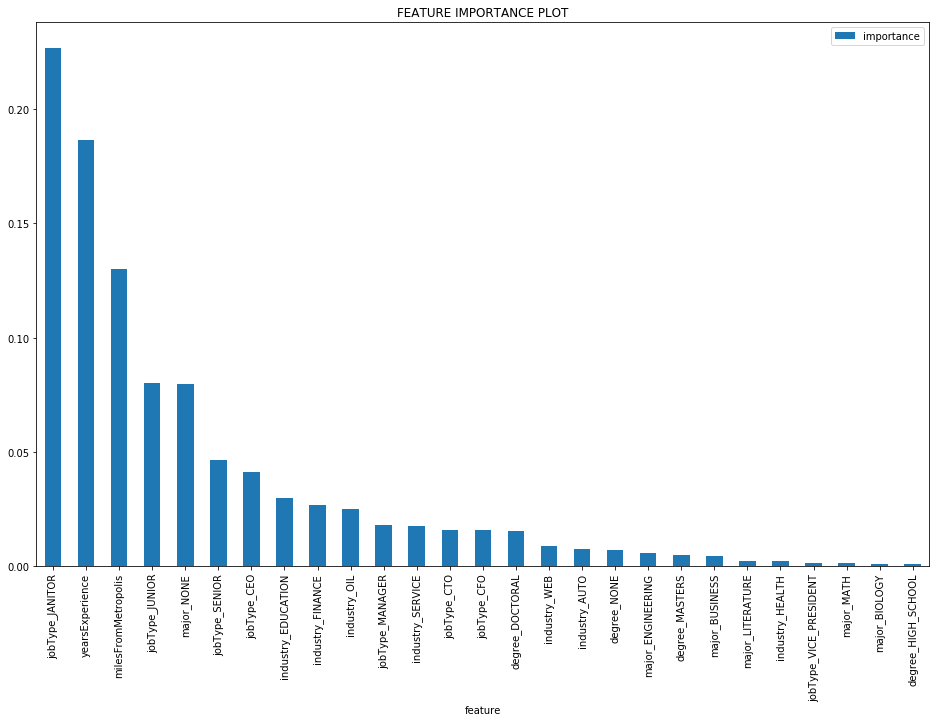

In [225]:
fig = feature_importances[0:27].plot.bar(figsize=(16,10))
fig.set_title('FEATURE IMPORTANCE PLOT')